In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
import pandas as pd
# Import time module
import time
import csv
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

ModuleNotFoundError: No module named 'scipy'

In [23]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [25]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [26]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8826615961f019d3e0de6fdada4d584


In [27]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8826615961f019d3e0de6fdada4d584&q=Boston


In [28]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [29]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [30]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [31]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":701,"main":"Mist","description":"mist","icon":"50d"},{"id":601,"main":"Snow","description":"snow","icon":"13d"}],"base":"stations","main":{"temp":31.14,"feels_like":20.3,"temp_min":28.99,"temp_max":33.01,"pressure":1009,"humidity":100},"visibility":1207,"wind":{"speed":12.66,"deg":360},"snow":{"1h":4.21},"clouds":{"all":90},"dt":1612731009,"sys":{"type":1,"id":3486,"country":"US","sunrise":1612698655,"sunset":1612735556},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [32]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'},
  {'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13d'}],
 'base': 'stations',
 'main': {'temp': 31.14,
  'feels_like': 20.3,
  'temp_min': 28.99,
  'temp_max': 33.01,
  'pressure': 1009,
  'humidity': 100},
 'visibility': 1207,
 'wind': {'speed': 12.66, 'deg': 360},
 'snow': {'1h': 4.21},
 'clouds': {'all': 90},
 'dt': 1612731009,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1612698655,
  'sunset': 1612735556},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [33]:
# Get the JSON data.
boston_data = city_weather.json()

In [34]:
boston_data['sys']

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1612698655,
 'sunset': 1612735556}

In [35]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 33.01 100 90 12.66


In [36]:
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-02-07 20:50:09'

In [39]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [40]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [43]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 3 of Set 25 | albany
Processing Record 4 of Set 25 | vanimo
Processing Record 5 of Set 25 | rikitea
Processing Record 6 of Set 25 | goderich
Processing Record 7 of Set 25 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 25 | saskatoon
Processing Record 9 of Set 25 | mananjary
Processing Record 10 of Set 25 | barrow
Processing Record 11 of Set 25 | ponta do sol
Processing Record 12 of Set 25 | svetlogorsk
Processing Record 13 of Set 25 | attawapiskat
City not found. Skipping...
Processing Record 14 of Set 25 | yellowknife
Processing Record 15 of Set 25 | vaini
Processing Record 16 of Set 25 | kapaa
Processing Record 17 of Set 25 | bluff
Processing Record 18 of Set 25 | mataura
Processing Record 19 of Set 25 | buin
Processing Record 20 of Set 25 | kazalinsk
City not found. Skipping...
Processing Record 21 of Set 25 | jamestown
Processing Record 22 of Set 25 | khash
Processing Record 23 of Set 25 | chokurdakh
Processing Record 24 of Set 25 | busselton
Pr

Processing Record 33 of Set 28 | bonfim
Processing Record 34 of Set 28 | shelburne
Processing Record 35 of Set 28 | corinth
Processing Record 36 of Set 28 | mlonggo
Processing Record 37 of Set 28 | kununurra
Processing Record 38 of Set 28 | nadym
Processing Record 39 of Set 28 | tumannyy
City not found. Skipping...
Processing Record 40 of Set 28 | hvammstangi
City not found. Skipping...
Processing Record 41 of Set 28 | cayambe
Processing Record 42 of Set 28 | hajos
Processing Record 43 of Set 28 | vostok
Processing Record 44 of Set 28 | nadvoitsy
Processing Record 45 of Set 28 | cape town
Processing Record 46 of Set 28 | shunyi
Processing Record 47 of Set 28 | guangyuan
Processing Record 48 of Set 28 | kaseda
Processing Record 49 of Set 28 | lorengau
Processing Record 50 of Set 28 | catazaja
Processing Record 1 of Set 29 | xining
Processing Record 2 of Set 29 | doctor pedro p. pena
City not found. Skipping...
Processing Record 3 of Set 29 | bilma
Processing Record 4 of Set 29 | ituni
C

Processing Record 14 of Set 32 | georgetown
Processing Record 15 of Set 32 | maghama
City not found. Skipping...
Processing Record 16 of Set 32 | abay
Processing Record 17 of Set 32 | ahipara
Processing Record 18 of Set 32 | sur
Processing Record 19 of Set 32 | pueblo nuevo
Processing Record 20 of Set 32 | nouadhibou
Processing Record 21 of Set 32 | temizhbekskaya
Processing Record 22 of Set 32 | vagur
Processing Record 23 of Set 32 | katangli
Processing Record 24 of Set 32 | kyaukse
Processing Record 25 of Set 32 | porto novo
Processing Record 26 of Set 32 | shipunovo
Processing Record 27 of Set 32 | sivas
Processing Record 28 of Set 32 | basco
Processing Record 29 of Set 32 | sunrise manor
Processing Record 30 of Set 32 | hirara
Processing Record 31 of Set 32 | fort smith
Processing Record 32 of Set 32 | lahuachaca
Processing Record 33 of Set 32 | zhaotong
Processing Record 34 of Set 32 | abeche
Processing Record 35 of Set 32 | iqaluit
Processing Record 36 of Set 32 | mehamn
Processi

Processing Record 1 of Set 36 | coquimbo
Processing Record 2 of Set 36 | massakory
Processing Record 3 of Set 36 | coihaique
Processing Record 4 of Set 36 | hamilton
Processing Record 5 of Set 36 | suesca
Processing Record 6 of Set 36 | aksu
Processing Record 7 of Set 36 | pombia
Processing Record 8 of Set 36 | jabiru
City not found. Skipping...
Processing Record 9 of Set 36 | jabinyanah
Processing Record 10 of Set 36 | awbari
Processing Record 11 of Set 36 | biswan
Processing Record 12 of Set 36 | springbok
Processing Record 13 of Set 36 | severo-yeniseyskiy
Processing Record 14 of Set 36 | zanjan
Processing Record 15 of Set 36 | magadan
Processing Record 16 of Set 36 | maltahohe
Processing Record 17 of Set 36 | bend
Processing Record 18 of Set 36 | labutta
City not found. Skipping...
Processing Record 19 of Set 36 | kangaatsiaq
Processing Record 20 of Set 36 | la ronge
Processing Record 21 of Set 36 | priargunsk
Processing Record 22 of Set 36 | ancud
Processing Record 23 of Set 36 | 

In [44]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,30.00,72,100,1.25,US,2021-02-07 20:54:03
1,Vanimo,-2.6741,141.3028,77.32,86,100,4.34,PG,2021-02-07 20:51:33
2,Rikitea,-23.1203,-134.9692,77.65,72,96,11.97,PF,2021-02-07 20:49:24
3,Goderich,43.7501,-81.7165,10.40,67,100,14.97,CA,2021-02-07 20:54:03
4,Saskatoon,52.1168,-106.6345,-25.01,68,1,3.44,CA,2021-02-07 20:51:26
5,Mananjary,-21.2167,48.3333,79.50,87,100,12.55,MG,2021-02-07 20:54:04
6,Barrow,71.2906,-156.7887,-23.80,76,1,11.50,US,2021-02-07 20:54:04
7,Ponta Do Sol,32.6667,-17.1000,59.00,69,40,5.99,PT,2021-02-07 20:54:04
8,Svetlogorsk,52.6333,29.7333,6.64,92,100,3.87,BY,2021-02-07 20:54:04
9,Yellowknife,62.4560,-114.3525,-32.01,61,1,4.61,CA,2021-02-07 20:51:35


In [48]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [49]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

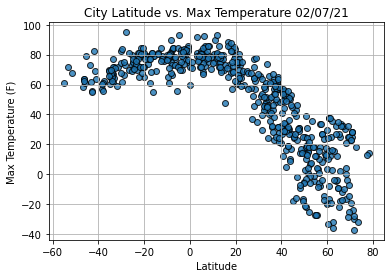

In [51]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

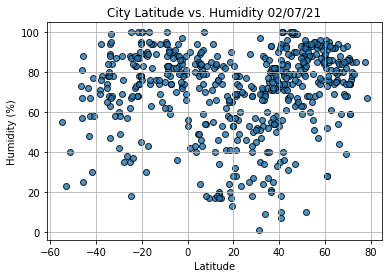

In [52]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

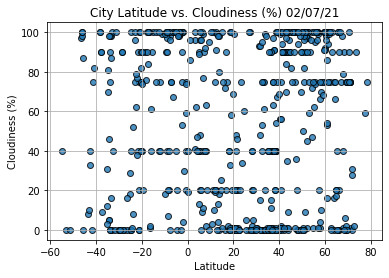

In [53]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

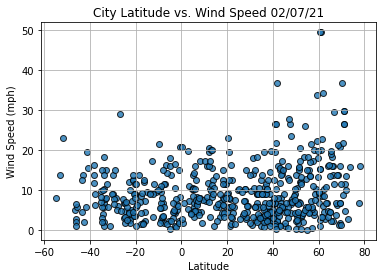

In [54]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [2]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [3]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

NameError: name 'city_data_df' is not defined